# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we've modified it to only use two classes (pizza 🍕 & steak 🥩) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> 🔑 **Note:** We start with a smaler dataset so we can experiment quickly and figure out what works (or better yet what doesn't work) before scaling up.

In [1]:
import zipfile

# pip install wget
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-10-28 12:02:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.128.144, 172.217.162.144, 142.251.128.16, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.128.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: 'pizza_steak.zip.2'

pizza_steak.zip.2   100%[===================>] 104.47M  53.0MB/s    in 2.0s    

2022-10-28 12:02:07 (53.0 MB/s) - 'pizza_steak.zip.2' saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza steak


In [4]:
!ls pizza_steak/train/steak/

1000205.jpg 1647351.jpg 2238681.jpg 2824680.jpg 3375959.jpg 417368.jpg
100135.jpg  1650002.jpg 2238802.jpg 2825100.jpg 3381560.jpg 4176.jpg
101312.jpg  165639.jpg  2254705.jpg 2826987.jpg 3382936.jpg 42125.jpg
1021458.jpg 1658186.jpg 225990.jpg  2832499.jpg 3386119.jpg 421476.jpg
1032846.jpg 1658443.jpg 2260231.jpg 2832960.jpg 3388717.jpg 421561.jpg
10380.jpg   165964.jpg  2268692.jpg 285045.jpg  3389138.jpg 438871.jpg
1049459.jpg 167069.jpg  2271133.jpg 285147.jpg  3393547.jpg 43924.jpg
1053665.jpg 1675632.jpg 227576.jpg  2855315.jpg 3393688.jpg 440188.jpg
1068516.jpg 1678108.jpg 2283057.jpg 2856066.jpg 3396589.jpg 442757.jpg
1068975.jpg 168006.jpg  2286639.jpg 2859933.jpg 339891.jpg  443210.jpg
1081258.jpg 1682496.jpg 2287136.jpg 286219.jpg  3417789.jpg 444064.jpg
1090122.jpg 1684438.jpg 2291292.jpg 2862562.jpg 3425047.jpg 444709.jpg
1093966.jpg 168775.jpg  229323.jpg  2865730.jpg 3434983.jpg 447557.jpg
1098844.jpg 1697339.jpg 2300534.jpg 2878151.jpg 3435358.jpg 461187.jpg
1100074.jp

In [5]:
import os

# Walk through pizza_stake directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/steak'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'
There are 2 directories and 0 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/steak'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'


In [6]:
# Another way to find out how many images are in a file
num_steak_image_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_image_train

750

To visualize our images, first let's get the class names programmatically.

In [7]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")

# Create a list of class_names from the subdirectories
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)


['pizza' 'steak']


In [8]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir+target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    
    print(f"Image shape: {img.shape}") # show the shape of the image
    
    return img

['3256974.jpg']
Image shape: (512, 512, 3)


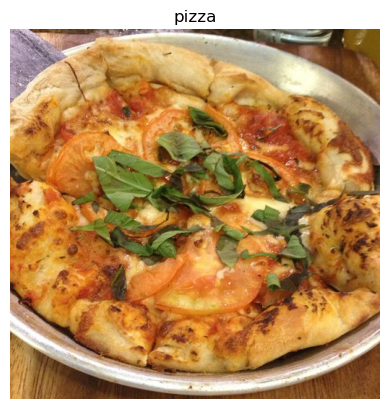

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

In [10]:
# View image as tensor (in numbers) of Red, Green and Blue color channels
# Actually giant arrays/tensors of different pixel values

import tensorflow as tf
tf.constant(img)

2022-10-28 12:02:23.143560: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[166, 149, 167],
        [163, 146, 164],
        [175, 158, 176],
        ...,
        [119,  89,  16],
        [118,  88,  15],
        [118,  88,  15]],

       [[162, 145, 163],
        [176, 159, 177],
        [195, 178, 196],
        ...,
        [120,  90,  17],
        [120,  90,  17],
        [122,  92,  19]],

       [[205, 188, 206],
        [185, 168, 186],
        [179, 162, 180],
        ...,
        [118,  88,  15],
        [118,  88,  15],
        [120,  90,  17]],

       ...,

       [[206, 147,  77],
        [174, 115,  45],
        [173, 114,  44],
        ...,
        [133,  79,  32],
        [122,  68,  21],
        [127,  73,  26]],

       [[209, 152,  81],
        [174, 117,  46],
        [189, 132,  61],
        ...,
        [129,  75,  28],
        [115,  61,  14],
        [119,  65,  18]],

       [[213, 156,  85],
        [188, 131,  60],
        [209, 152,  81],
        ...,
        [133,  77,  3

In [11]:
# View the image shape
img.shape # returns width, height, color channels

(512, 512, 3)

In [12]:
# Get all the pixel values between 0 & 1 (for scale - also referred to as normlize)
img/255.0

array([[[0.65098039, 0.58431373, 0.65490196],
        [0.63921569, 0.57254902, 0.64313725],
        [0.68627451, 0.61960784, 0.69019608],
        ...,
        [0.46666667, 0.34901961, 0.0627451 ],
        [0.4627451 , 0.34509804, 0.05882353],
        [0.4627451 , 0.34509804, 0.05882353]],

       [[0.63529412, 0.56862745, 0.63921569],
        [0.69019608, 0.62352941, 0.69411765],
        [0.76470588, 0.69803922, 0.76862745],
        ...,
        [0.47058824, 0.35294118, 0.06666667],
        [0.47058824, 0.35294118, 0.06666667],
        [0.47843137, 0.36078431, 0.0745098 ]],

       [[0.80392157, 0.7372549 , 0.80784314],
        [0.7254902 , 0.65882353, 0.72941176],
        [0.70196078, 0.63529412, 0.70588235],
        ...,
        [0.4627451 , 0.34509804, 0.05882353],
        [0.4627451 , 0.34509804, 0.05882353],
        [0.47058824, 0.35294118, 0.06666667]],

       ...,

       [[0.80784314, 0.57647059, 0.30196078],
        [0.68235294, 0.45098039, 0.17647059],
        [0.67843137, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we a need way to:
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scalling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, 
                                               batch_size=32, 
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir, 
                                               batch_size=32, 
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model
# Same as the Tiny VGG on the CNN explainer website: https://poloclub.github.io/cnn-explainer/
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Fit the model (train_data generated in flow_from_directory function contains X and y for fit)
history_1 = model_1.fit(train_data, 
                        epochs=5, 
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 16s 320ms/step - loss: 0.5522 - accuracy: 0.7093 - val_loss: 0.3912 - val_accuracy: 0.8440
Epoch 2/5
47/47 [==============================] - 15s 320ms/step - loss: 0.4079 - accuracy: 0.8233 - val_loss: 0.3222 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 15s 319ms/step - loss: 0.4225 - accuracy: 0.8213 - val_loss: 0.3713 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 15s 319ms/step - loss: 0.3740 - accuracy: 0.8320 - val_loss: 0.3472 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 15s 320ms/step - loss: 0.3380 - accuracy: 0.8553 - val_loss: 0.3034 - val_accuracy: 0.8800


In [14]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    